## Import CSVs

In [1]:
import os
print(os.environ['PATH'])

import numpy as np 
import pandas as pd 
import sys, requests, shutil, os
data=pd.read_csv('../../Dataset/train.csv')
test_data = pd.read_csv('../../Dataset/test.csv')
data.head(5)

C:\Users\User\AppData\Local\Continuum\anaconda3;C:\Users\User\AppData\Local\Continuum\anaconda3\Library\mingw-w64\bin;C:\Users\User\AppData\Local\Continuum\anaconda3\Library\usr\bin;C:\Users\User\AppData\Local\Continuum\anaconda3\Library\bin;C:\Users\User\AppData\Local\Continuum\anaconda3\Scripts;C:\Users\User\AppData\Local\Continuum\anaconda3\bin;C:\Users\User\AppData\Local\Continuum\anaconda3\condabin;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Program Files\nodejs;C:\Program Files\Git\cmd;C:\Users\User\AppData\Local\Microsoft\WindowsApps;C:\Program Files\JetBrains\PyCharm 2019.2.1\bin;C:\Users\User\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\User\AppData\Roaming\npm;C:\Program Files\JetBrains\CLion 2019.2\bin;C:\Users\User\AppData\Local\GitHubDesktop\bin


FileNotFoundError: [Errno 2] File ../../Dataset/train.csv does not exist: '../../Dataset/train.csv'

## Sample the data

In [4]:
landmark_list = [str(x) for x in list(range(1000,3000))]
data_sample = data[data['landmark_id'].isin(landmark_list)]
# data_sample.landmark_id.value_counts()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

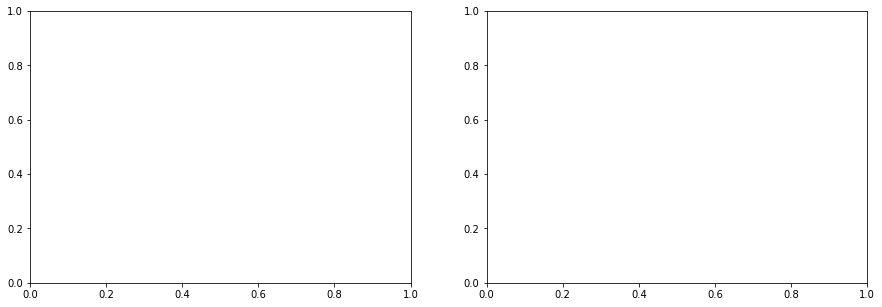

In [5]:
# Check data distribution
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import subplots

colors = np.array(['#4285f4','#34a853','#fbbc05','#ea4335'])
#Define the order in which to display the graph
order = ['1-5','5-10','10-50','50-100','100-200','200-500','>=500']
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))


def plot_distribution(data_f, data_k, axis):
    # data['landmark_id'].value_counts()
    x=data_f.landmark_id.value_counts().index
    y=pd.DataFrame(data_f.landmark_id.value_counts())

    #Create a variable to group the number of image sin each class
    y['Number of images'] = np.where(y['landmark_id']>=500,'>=500',y['landmark_id'])
    y['Number of images'] = np.where((y['landmark_id']>=200) & (y['landmark_id']<500),'200-500',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=100) & (y['landmark_id']<200),'100-200',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=50) & (y['landmark_id']<100),'50-100',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=10) & (y['landmark_id']<50),'10-50',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=5) & (y['landmark_id']<10),'5-10',y['Number of images'])
    y['Number of images'] = np.where((y['landmark_id']>=0) & (y['landmark_id']<5),'1-5',y['Number of images'])

    y['Number of images'].value_counts().loc[order].plot(kind = 'bar',color = colors,width = 0.8, ax=axis)
    axis.set_xlabel('Number of images')
    axis.set_ylabel('Number of classes')
    axis.set_title(data_k)
    
plot_distribution(data, 'Original', ax1)
plot_distribution(data_sample, 'Sample', ax2)

In [ ]:
import numpy as np 
import pandas as pd 
import sys, requests, shutil, os

In [ ]:
fds=pd.read_csv('filtered_dataset.csv')

In [ ]:
fds=pd.read_csv('filtered_dataset.csv', header=None)
fds.columns = ['id','url','landmark_id']
fds.head(5)

In [ ]:

data =fds
orig=fds

In [ ]:
landmark_list = [str(x) for x in list(range(0,10))]
data_sample = data[data['landmark_id'].isin(landmark_list)]

In [ ]:
len(data)

In [ ]:
len(data_sample)

## Download Images

In [ ]:
#Ref: https://www.kaggle.com/lyakaap/fast-resized-image-download-python-3
import re
TARGET_SIZE = 96 #imports images of resolution 96x96

'''change URLs to resize images to target size'''
def overwrite_urls(df):
    def reso_overwrite(url_tail, reso=TARGET_SIZE):
        pattern = 's[0-9]+'
        search_result = re.match(pattern, url_tail)
        if search_result is None:
            return url_tail
        else:
            return 's{}'.format(reso)
    
    def join_url(parsed_url, s_reso):
        parsed_url[-2] = s_reso
        return '/'.join(parsed_url)
    
    df = df[df.url.apply(lambda x: len(x.split('/'))>1)]
    parsed_url = df.url.apply(lambda x: x.split('/'))
    train_url_tail = parsed_url.apply(lambda x: x[-2])
    resos = train_url_tail.apply(lambda x: reso_overwrite(x, reso=TARGET_SIZE))

    overwritten_df = pd.concat([parsed_url, resos], axis=1)
    overwritten_df.columns = ['url', 's_reso']
    df['url'] = overwritten_df.apply(lambda x: join_url(x['url'], x['s_reso']), axis=1)
    return df
print (len(data_sample))
data_sample_resize = overwrite_urls(data_sample)
print (len(data_sample_resize))

print ('1. URLs overwritten')

'''Split to test and train'''
data_test = pd.DataFrame(columns = ['id','url','landmark_id'])
data_training_all = pd.DataFrame(columns = ['id','url','landmark_id'])
percent_test = 0.01 #takes 1% from each class as holdout data

import random
random.seed(42)
for landmark_id in set(data_sample_resize['landmark_id']):
    n=1
    t = data_sample_resize[(data_sample_resize.landmark_id == landmark_id)] #get all images for a landmark id
    i = 0
    r =[]
    while i < len(t.id):
        it = i
        r.append(t.id.iloc[it])  #create a list of all these images
        i += 1
        
    test = random.sample(r,int(percent_test*len(r))) #randomly pick a sample of 1% images from list 'r'
    training = list(set(r) - set(test))  #get the remaining images
    data_t = data_sample_resize[data_sample_resize.id.isin(test)] #holdout dataset
    data_tr = data_sample_resize[data_sample_resize.id.isin(training)] #training dataset
    data_test = data_test.append(data_t)  
    data_training_all = data_training_all.append(data_tr)
    n+=1

print ('2. train and test set created')


'''Split into train and validation set'''
data_valid = pd.DataFrame(columns = ['id','url','landmark_id'])
data_train = pd.DataFrame(columns = ['id','url','landmark_id'])
percent_validation = 0.2 #takes 20% from each class as holdout data
import random
random.seed(42)
for landmark_id in set(data_training_all['landmark_id']):
    n=1
    t = data_training_all[(data_training_all.landmark_id == landmark_id)]
    i = 0
    r =[]
    while i < len(t.id):
        it = i
        r.append(t.id.iloc[it])
        i += 1
        
    valid = random.sample(r,int(percent_validation*len(r)))
    train = list(set(r) - set(valid)) 
    data_v = data_training_all[data_training_all.id.isin(valid)]
    data_t = data_training_all[data_training_all.id.isin(train)]
    data_valid = data_valid.append(data_v)
    data_train = data_train.append(data_t)
    n+=1

print ('3. train and validation set created')